In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ENSAYO = pd.read_csv('Data-Collisions.csv')

C:\Users\admegonzalez\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ENSAYO.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
ENSAYO = ENSAYO[ENSAYO['STATUS'] == 'Matched']

In [5]:
df=ENSAYO[['SEVERITYCODE','OBJECTID','INCKEY','COLDETKEY','SEVERITYCODE.1','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE','SEGLANEKEY','CROSSWALKKEY',
           'ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','JUNCTIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR']]

In [6]:
df=df.dropna()

In [7]:
df.shape

(182894, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182894 entries, 0 to 194672
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    182894 non-null  int64 
 1   OBJECTID        182894 non-null  int64 
 2   INCKEY          182894 non-null  int64 
 3   COLDETKEY       182894 non-null  int64 
 4   SEVERITYCODE.1  182894 non-null  int64 
 5   PERSONCOUNT     182894 non-null  int64 
 6   PEDCOUNT        182894 non-null  int64 
 7   PEDCYLCOUNT     182894 non-null  int64 
 8   VEHCOUNT        182894 non-null  int64 
 9   SDOT_COLCODE    182894 non-null  int64 
 10  SEGLANEKEY      182894 non-null  int64 
 11  CROSSWALKKEY    182894 non-null  int64 
 12  ADDRTYPE        182894 non-null  object
 13  SEVERITYDESC    182894 non-null  object
 14  COLLISIONTYPE   182894 non-null  object
 15  JUNCTIONTYPE    182894 non-null  object
 16  UNDERINFL       182894 non-null  object
 17  WEATHER         182894 non-nu

In [9]:
df['UNDERINFL'].replace(to_replace=['0','1'], value=[0,1],inplace=True)

In [10]:
df['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)

In [11]:
df['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)

In [12]:
df.columns

Index(['SEVERITYCODE', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'SEVERITYCODE.1',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE',
       'SEGLANEKEY', 'CROSSWALKKEY', 'ADDRTYPE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'HITPARKEDCAR'],
      dtype='object')

In [13]:
df_group= df.groupby("SEVERITYDESC")["SEVERITYCODE"].count()
df_group

SEVERITYDESC
Injury Collision                   56625
Property Damage Only Collision    126269
Name: SEVERITYCODE, dtype: int64

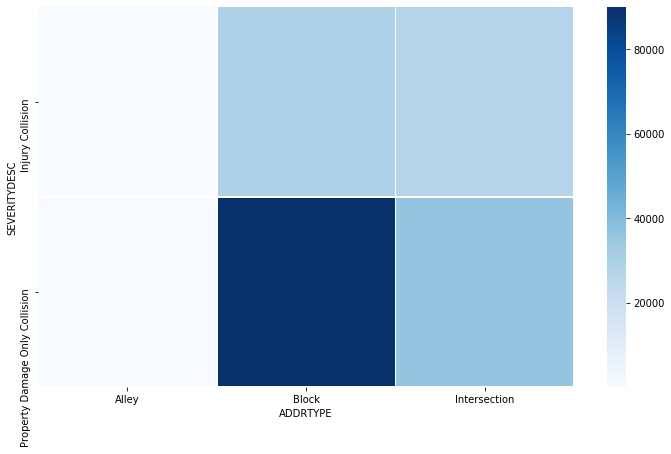

In [14]:
table = pd.crosstab(df["SEVERITYDESC"], df["ADDRTYPE"], dropna=False)
plt.figure(figsize=(12,7)) 
sns.heatmap(table,annot=False,cmap='Blues',linewidth=0.5) 
plt.show()

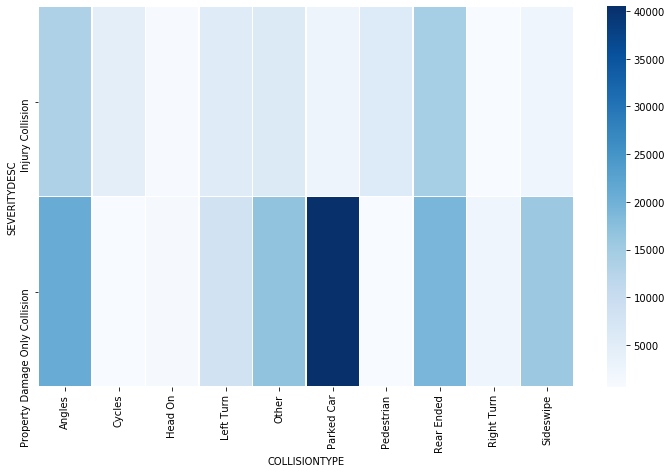

In [15]:
table = pd.crosstab(df["SEVERITYDESC"], df["COLLISIONTYPE"], dropna=False)
plt.figure(figsize=(12,7)) 
sns.heatmap(table,annot=False,cmap='Blues',linewidth=0.5) 
plt.show()

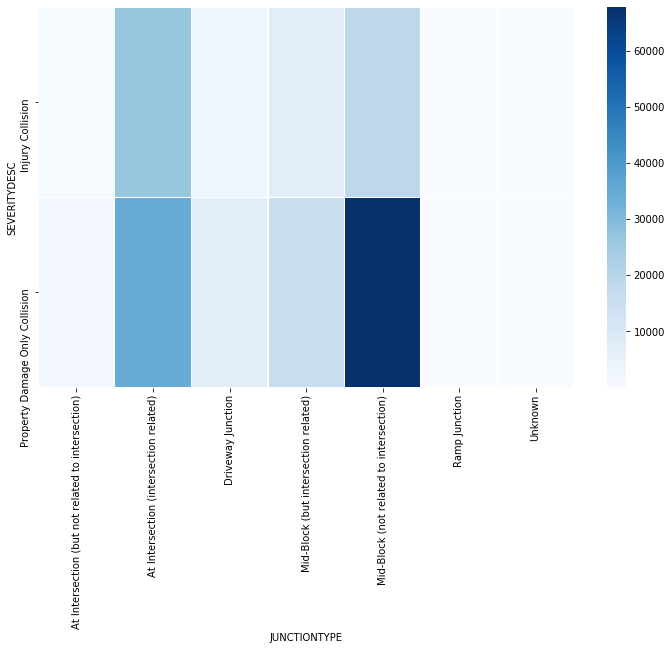

In [40]:
table = pd.crosstab(df["SEVERITYDESC"], df["JUNCTIONTYPE"], dropna=False)
plt.figure(figsize=(12,7)) 
sns.heatmap(table,annot=False,cmap='Blues',linewidth=0.5) 
plt.show()

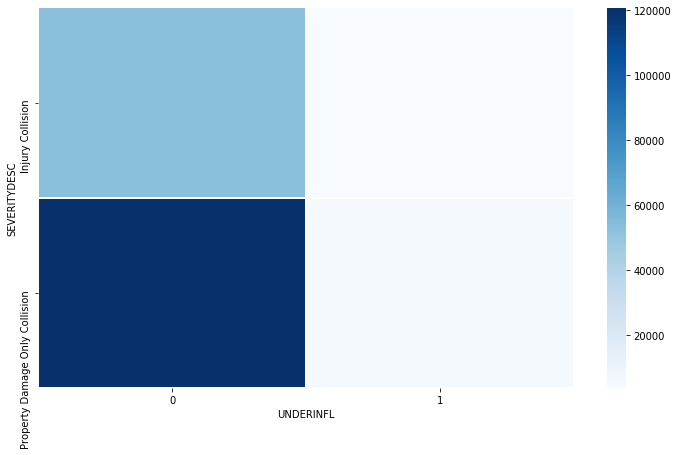

In [41]:
table = pd.crosstab(df["SEVERITYDESC"], df["UNDERINFL"], dropna=False)
plt.figure(figsize=(12,7)) 
sns.heatmap(table,annot=False,cmap='Blues',linewidth=0.5) 
plt.show()

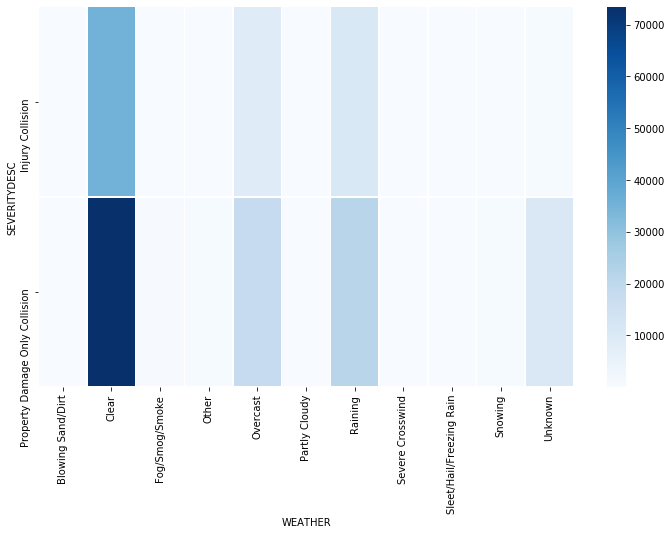

In [42]:
table = pd.crosstab(df["SEVERITYDESC"], df["WEATHER"], dropna=False)
plt.figure(figsize=(12,7)) 
sns.heatmap(table,annot=False,cmap='Blues',linewidth=0.5) 
plt.show()

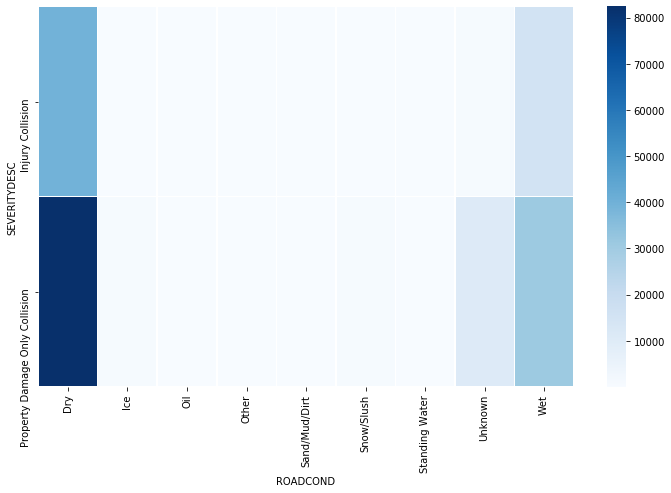

In [43]:
table = pd.crosstab(df["SEVERITYDESC"], df["ROADCOND"], dropna=False)
plt.figure(figsize=(12,7)) 
sns.heatmap(table,annot=False,cmap='Blues',linewidth=0.5) 
plt.show()

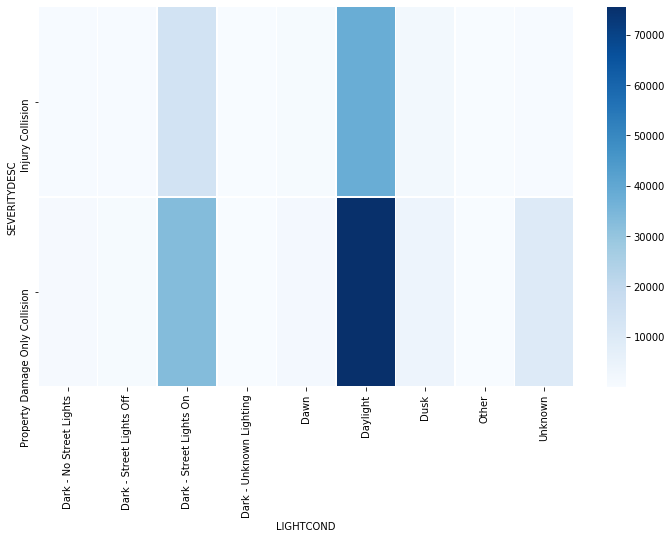

In [44]:
table = pd.crosstab(df["SEVERITYDESC"], df["LIGHTCOND"], dropna=False)
plt.figure(figsize=(12,7)) 
sns.heatmap(table,annot=False,cmap='Blues',linewidth=0.5) 
plt.show()

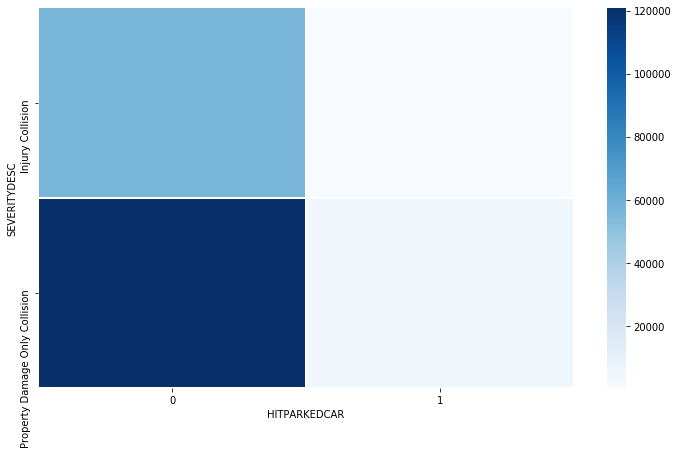

In [45]:
table = pd.crosstab(df["SEVERITYDESC"], df["HITPARKEDCAR"], dropna=False)
plt.figure(figsize=(12,7)) 
sns.heatmap(table,annot=False,cmap='Blues',linewidth=0.5) 
plt.show()

In [14]:
df=pd.get_dummies(df, columns=['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND'])

In [15]:
df.columns

Index(['SEVERITYCODE', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'SEVERITYCODE.1',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE',
       'SEGLANEKEY', 'CROSSWALKKEY', 'SEVERITYDESC', 'UNDERINFL',
       'HITPARKEDCAR', 'ADDRTYPE_Alley', 'ADDRTYPE_Block',
       'ADDRTYPE_Intersection', 'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles',
       'COLLISIONTYPE_Head On', 'COLLISIONTYPE_Left Turn',
       'COLLISIONTYPE_Other', 'COLLISIONTYPE_Parked Car',
       'COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Rear Ended',
       'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe',
       'JUNCTIONTYPE_At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Unknown',
       'WEATHER_Blowing Sand/Dirt', 'WEA

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

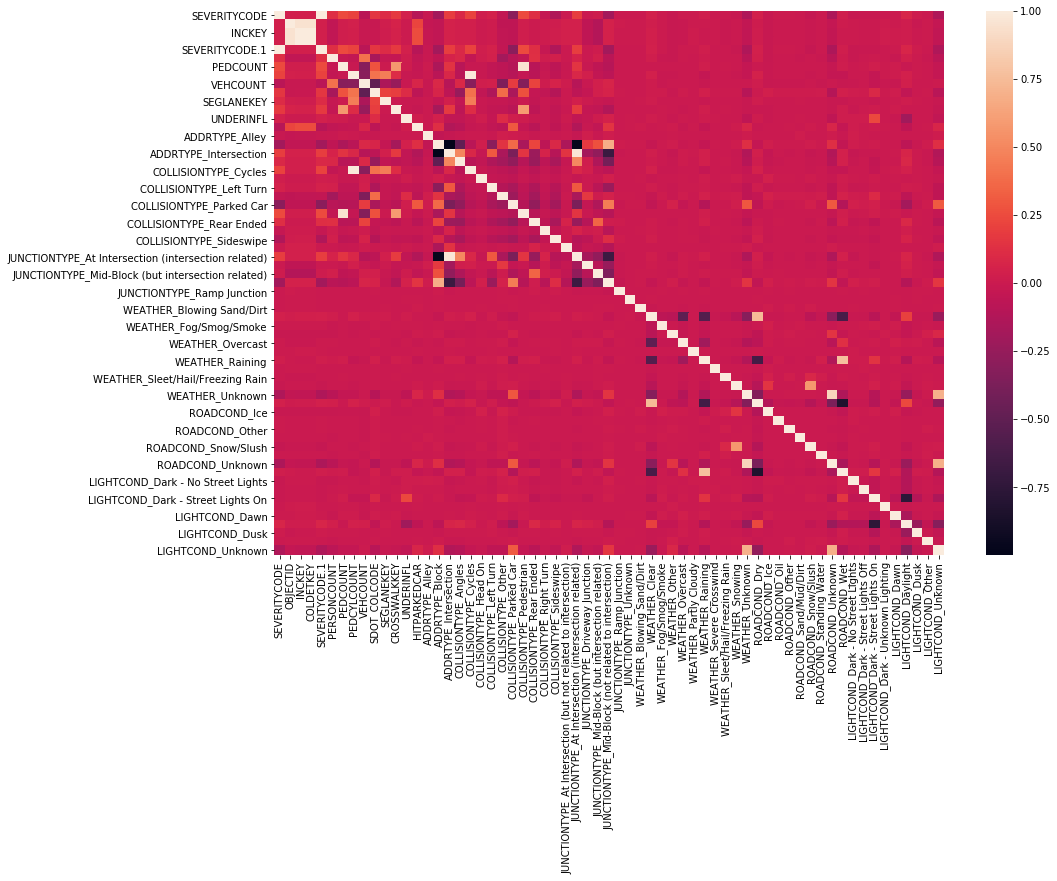

In [17]:
plt.figure(figsize=(15,10)) 
sns.heatmap(df.corr(),annot=False) 
plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import pydotplus

In [24]:
X=df[['COLLISIONTYPE_Parked Car','COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Cycles','COLLISIONTYPE_Sideswipe',
      'COLLISIONTYPE_Other','COLLISIONTYPE_Right Turn', 'UNDERINFL','WEATHER_Unknown','LIGHTCOND_Unknown',
      'ROADCOND_Unknown','HITPARKEDCAR','JUNCTIONTYPE_Mid-Block (not related to intersection)',
      'JUNCTIONTYPE_Mid-Block (but intersection related)','JUNCTIONTYPE_Driveway Junction','ADDRTYPE_Intersection']] 

In [31]:
y=df[['SEVERITYDESC']]

In [32]:
severity_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
severity_tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
name_features=X.columns
importance_features=severity_tree.feature_importances_
features_dbase = pd.DataFrame({"features": name_features, "importance": importance_features})

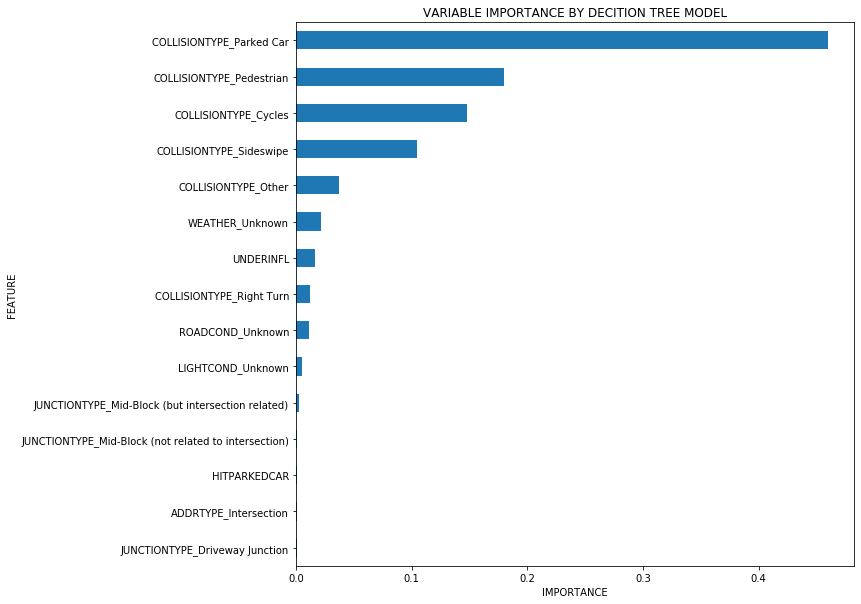

In [34]:
plt.figure(figsize=(10,10))
features_dbase = features_dbase.groupby('features').mean()
features_dbase = features_dbase.sort_values(by = 'importance',ascending = True)
features_dbase['importance'].plot(kind='barh')

plt.xlabel('IMPORTANCE')
plt.ylabel('FEATURE')
plt.title('VARIABLE IMPORTANCE BY DECITION TREE MODEL')

plt.show()

In [28]:
from sklearn import tree

[Text(167.4, 195.696, 'X[0] <= 0.5\nentropy = 0.893\nsamples = 182894\nvalue = [56625, 126269]'),
 Text(83.7, 152.208, 'X[1] <= 0.5\nentropy = 0.962\nsamples = 139775\nvalue = [53993, 85782]'),
 Text(41.85, 108.72, 'X[2] <= 0.5\nentropy = 0.944\nsamples = 133262\nvalue = [48141, 85121]'),
 Text(20.925, 65.232, 'X[3] <= 0.5\nentropy = 0.924\nsamples = 127900\nvalue = [43438, 84462]'),
 Text(10.4625, 21.744, '\n  (...)  \n'),
 Text(31.387500000000003, 21.744, '\n  (...)  \n'),
 Text(62.775000000000006, 65.232, 'X[8] <= 0.5\nentropy = 0.538\nsamples = 5362\nvalue = [4703, 659]'),
 Text(52.3125, 21.744, '\n  (...)  \n'),
 Text(73.2375, 21.744, '\n  (...)  \n'),
 Text(125.55000000000001, 108.72, 'X[7] <= 0.5\nentropy = 0.474\nsamples = 6513\nvalue = [5852, 661]'),
 Text(104.625, 65.232, 'X[9] <= 0.5\nentropy = 0.471\nsamples = 6346\nvalue = [5708, 638]'),
 Text(94.16250000000001, 21.744, '\n  (...)  \n'),
 Text(115.0875, 21.744, '\n  (...)  \n'),
 Text(146.475, 65.232, 'X[6] <= 0.5\nentropy

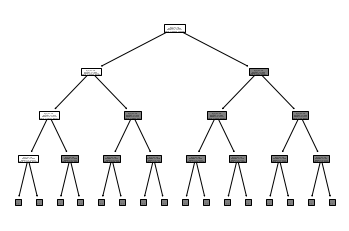

In [35]:
tree.plot_tree(severity_tree,max_depth=3) 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [52]:
itera = list(range(1,1000))
score_values_extratrees = []
f1_values_extratrees = []
jaccard_values_extratrees = []
for i in itera:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    EXTRATREES_ciclo=DecisionTreeClassifier(criterion="entropy", max_depth = 7)
    EXTRATREES_ciclo.fit(X_train, y_train)
    PREDICT_EXTRATREES_ciclo = EXTRATREES_ciclo.predict(X_test)
    
    score_extratrees = metrics.accuracy_score(y_test, PREDICT_EXTRATREES_ciclo)
    score_values_extratrees.append(score_extratrees)
    
    f1_extratrees = f1_score(y_test, PREDICT_EXTRATREES_ciclo, average='weighted')
    f1_values_extratrees.append(f1_extratrees)

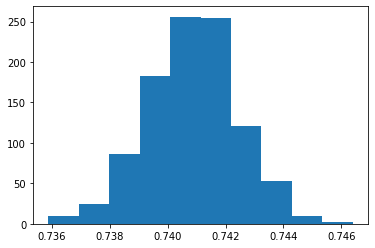

In [53]:
plt.hist(score_values_extratrees)
plt.show()

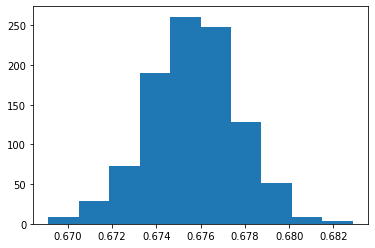

In [54]:
plt.hist(f1_values_extratrees)
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(y_test, PREDICT_EXTRATREES_ciclo)

array([[ 3120, 13931],
       [  400, 37418]], dtype=int64)